In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [14]:
url = "https://raw.githubusercontent.com/content-anu/dataset-polynomial-regression/master/Position_Salaries.csv"
df=pd.read_csv(url,index_col=0)

In [15]:
df

,Level,Salary
Position,,
Business Analyst,1,45000
Junior Consultant,2,50000
Senior Consultant,3,60000
Manager,4,80000
Country Manager,5,110000
Region Manager,6,150000
Partner,7,200000
Senior Partner,8,300000
C-level,9,500000


In [17]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [18]:
df.shape

(10, 2)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Business Analyst to CEO
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Level   10 non-null     int64
 1   Salary  10 non-null     int64
dtypes: int64(2)
memory usage: 240.0+ bytes


In [22]:
X=df['Level'].values
y=df['Salary'].values

In [24]:
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [25]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [26]:
# Reshaping
X=X.reshape(-1,1)
y=y.reshape(-1,1)

In [27]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [28]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

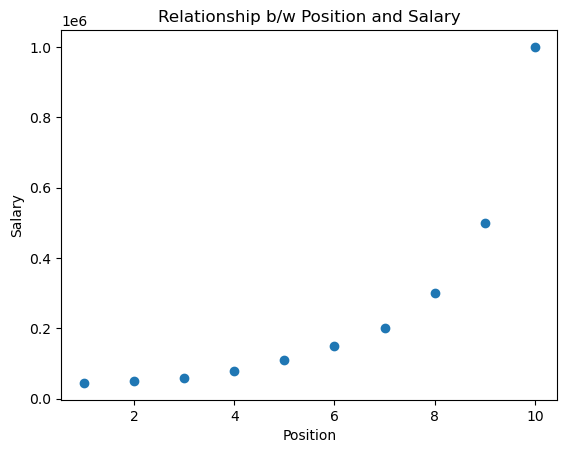

In [43]:
plt.scatter(X,y,label='Scatter Plot')
plt.title('Relationship b/w Position and Salary')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

In [30]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

#### Trying Linear Regression

In [33]:
lr=LinearRegression()
lr.fit(X,y)
y_pred=lr.predict(X)
y_pred

array([[-114454.54545455],
       [ -33575.75757576],
       [  47303.03030303],
       [ 128181.81818182],
       [ 209060.60606061],
       [ 289939.39393939],
       [ 370818.18181818],
       [ 451696.96969697],
       [ 532575.75757576],
       [ 613454.54545455]])

In [44]:
#Calculating the slope and the intercept value
a=lr.coef_
b=lr.intercept_,
print("The estimated model Slope is ",a)
print("The estiamted model intercept is ",b)

The estimated model Slope is  [[80878.78787879]]
The estiamted model intercept is  (array([-195333.33333333]),)


In [45]:
mse=mean_squared_error(y,y_pred)
rmse=np.sqrt(mse)
print("The MSE value is: ",mse)
print("The RMSE value is:",rmse)

The MSE value is:  26695878787.878784
The RMSE value is: 163388.73519272613


In [38]:
r2=r2_score(y,y_pred)
print("The R2 score is:",r2)

The R2 score is: 0.6690412331929895


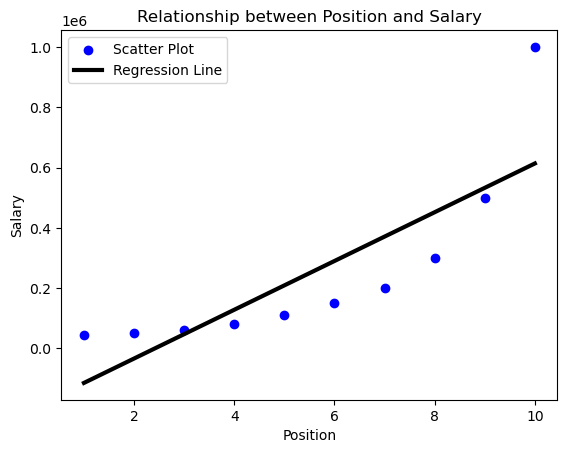

In [41]:
# Plot the regression line
plt.scatter(X,y,color='blue',label='Scatter Plot')
plt.plot(X,y_pred,color='black',linewidth=3,label='Regression Line')
plt.title("Relationship between Position and Salary")
plt.xlabel('Position')
plt.ylabel('Salary')
plt.legend()

#### Polynomial Regression

In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=3)
X_poly=poly_reg.fit_transform(X)

In [47]:
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [48]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [50]:
lr_1=LinearRegression()
lr_1.fit(X_poly,y)

LinearRegression()

In [51]:
y_pred_1=lr_1.predict(X_poly)
y_pred_1

array([[ 14902.09790208],
       [ 78759.9067599 ],
       [ 94960.37296038],
       [ 88223.77622379],
       [ 83270.39627041],
       [104820.51282052],
       [177594.40559441],
       [326312.35431235],
       [575694.63869463],
       [950461.53846153]])

In [56]:
mse=mean_squared_error(y,y_pred_1)
rmse=np.sqrt(mse)
print("The MSE value is: ",mse)
print("The RMSE value is:",rmse)

The MSE value is:  1515662004.6620107
The RMSE value is: 38931.50401232928


In [57]:
r2=r2_score(y,y_pred_1)
print("The R2 score is:",r2)

The R2 score is: 0.9812097727913366


In [55]:
a=lr.coef_
b=lr.intercept_,
print("The estimated model Slope is ",a)
print("The estiamted model intercept is ",b)

The estimated model Slope is  [[80878.78787879]]
The estiamted model intercept is  (array([-195333.33333333]),)


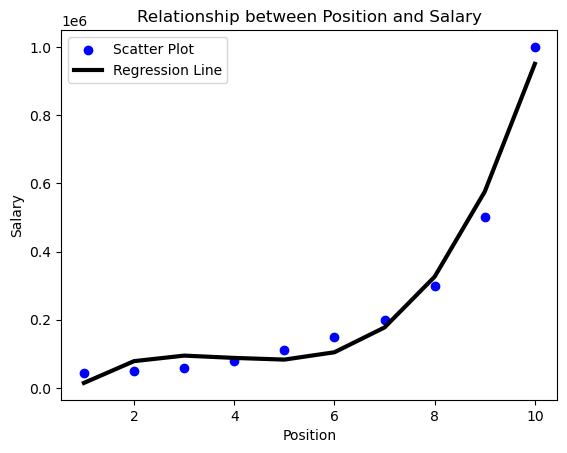

In [58]:
plt.scatter(X,y,color='blue',label='Scatter Plot')
plt.plot(X,y_pred_1,color='black',linewidth=3,label='Regression Line')
plt.title("Relationship between Position and Salary")
plt.xlabel('Position')
plt.ylabel('Salary')
plt.legend()

In [60]:
lr.predict([[6.5]])

array([[330378.78787879]])

In [62]:
lr_1.predict(poly_reg.transform([[6.5]]))

array([[133259.46969698]])